In [ ]:
#Box plot
#scatter plot
#probability density plot
#histogram
#subplot
#facetgrid

In [1]:
import numpy as np,pandas as pd

In [2]:
car = pd.read_excel("D:\Manipal Pro learn\Term1\EDA\Dataset\Cars.xlsx")
car.head()

,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),16,26,p,compact


In [4]:
# Car city mileage distribution

from matplotlib import pyplot as plt
plt.hist(car['cty'])
plt.xlabel('Car city mileage')
plt.ylabel('No. of cars')
plt.show()

<Figure size 640x480 with 1 Axes>

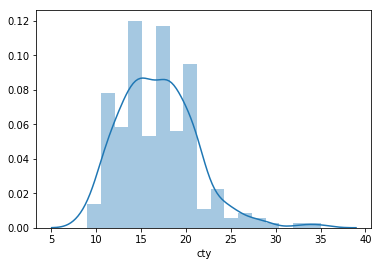

In [10]:
import seaborn as sns
#probability dist plot
sns.distplot(car['cty'])

In [11]:
#to check skewness
car.skew()

displ    0.444316
year     0.000000
cyl      0.113800
cty      0.796561
hwy      0.369236
dtype: float64

In [13]:
#skewness treatment - Square root tranformation
car['cty_sqrt']= np.sqrt(car['cty'])
car.skew()

displ       0.444316
year        0.000000
cyl         0.113800
cty         0.796561
hwy         0.369236
cty_sqrt    0.359486
dtype: float64

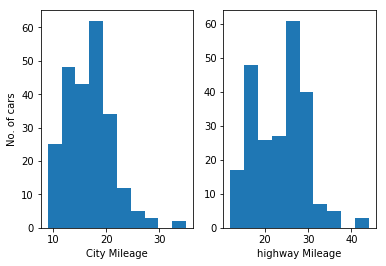

In [15]:
#subplot

fig = plt.figure()

plt.subplot(1,2,1)

plt.hist(car['cty'])
plt.xlabel('City Mileage')
plt.ylabel('No. of cars')

plt.subplot(1,2,2)

plt.hist(car['hwy'])
plt.xlabel('highway Mileage')

plt.show()

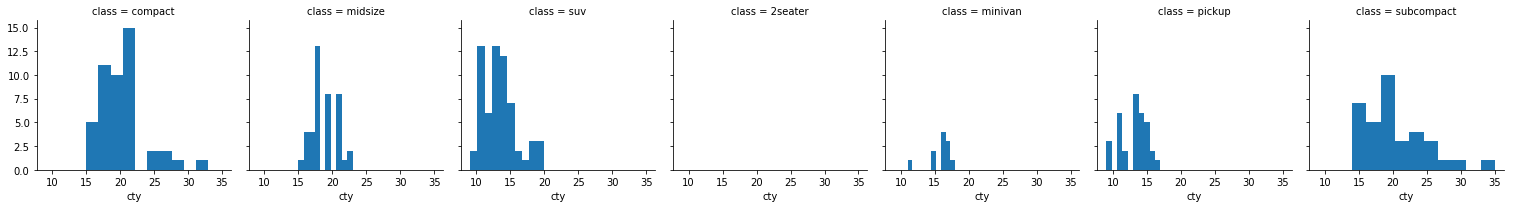

In [16]:
g = sns.FacetGrid(car,col = 'class')
g = g.map(plt.hist,'cty')


In [37]:
q1 = np.quantile(car['cty'],0.25)
q3 = np.quantile(car['cty'],0.75)

ul = q3 + (1.5 * (q3 - q1))
ll = q1 - (1.5 * (q3 - q1))
print(ul,ll)
car[(car['cty'] > ul) | (car['cty'] < ll )]

26.5 6.5


,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,class,cty_sqrt
99,honda,civic,1.6,1999,4,manual(m5),28,33,r,subcompact,5.291503
196,toyota,corolla,1.8,2008,4,manual(m5),28,37,r,compact,5.291503
212,volkswagen,jetta,1.9,1999,4,manual(m5),33,44,d,compact,5.744563
221,volkswagen,new beetle,1.9,1999,4,manual(m5),35,44,d,subcompact,5.916080
222,volkswagen,new beetle,1.9,1999,4,auto(l4),29,41,d,subcompact,5.385165


{'whiskers': [<matplotlib.lines.Line2D at 0x161c2d68b00>,
 'caps': [<matplotlib.lines.Line2D at 0x161c2d68f28>,
 'boxes': [<matplotlib.lines.Line2D at 0x161c239ef98>],
 'medians': [<matplotlib.lines.Line2D at 0x161c2d6f860>],
 'fliers': [<matplotlib.lines.Line2D at 0x161c2d6fba8>],
 'means': []}

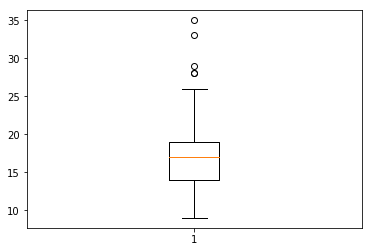

In [5]:
plt.boxplot(car['cty'])

In [6]:
car['class'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

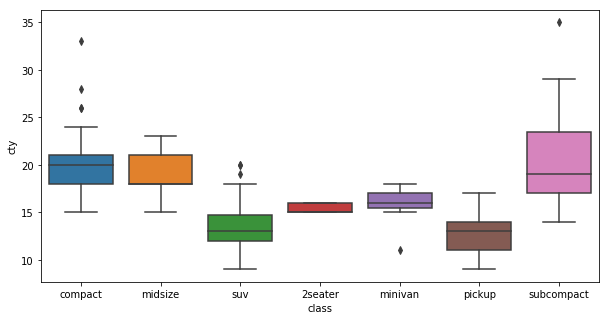

In [10]:
#boxplot of different class with city mileage
import seaborn as sns
plt.rcParams['figure.figsize'] = [10,5]
#sns.boxplot(car['class'],car['cty'])
sns.boxplot(data = car,x='class',y='cty')

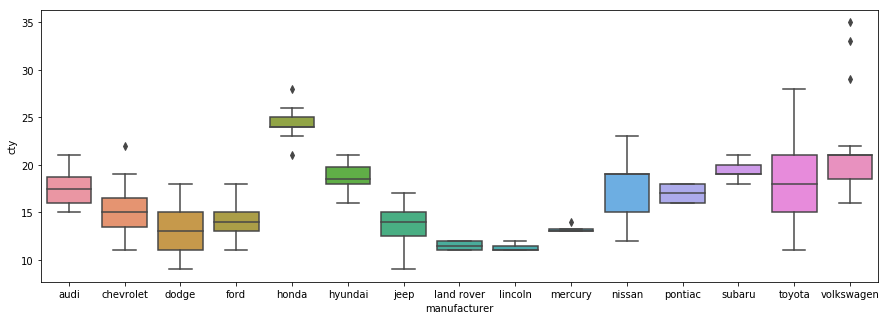

In [12]:
plt.rcParams['figure.figsize'] = [15,5]
sns.boxplot(data = car,x='manufacturer',y='cty')

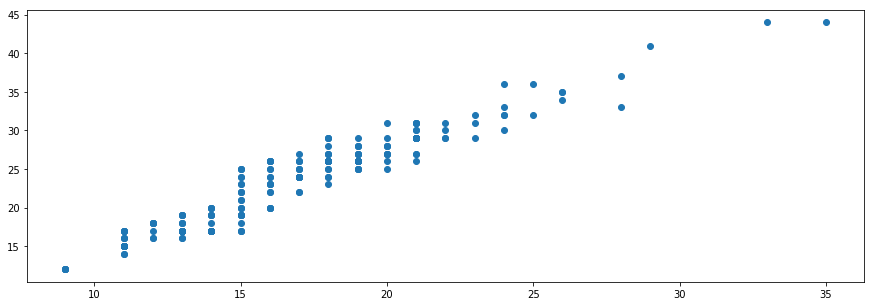

In [13]:
plt.scatter(car['cty'],car['hwy'])

In [15]:
car[car['cty']<10]


,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,class
54,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),9,12,e,pickup
59,dodge,durango 4wd,4.7,2008,8,auto(l5),9,12,e,suv
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),9,12,e,pickup
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),9,12,e,pickup
126,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),9,12,e,suv
